<a href="https://colab.research.google.com/github/ucfilho/Raianars_July_2020/blob/master/Frank_Noisy_Quartic_jun_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Noisy_Quartic
# In the paper Ngen=3000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

fatal: destination path 'Raianars_July_2020' already exists and is not an empty directory.
/content/Raianars_July_2020


In [3]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=3000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Noisy_Quartic'
Fun=Function.Noisy_Quartic

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [5]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_July_2020/ANN_read_matrix


In [6]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [7]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [8]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [9]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [10]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [11]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [12]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
#TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE)
#p=int(p/2) 
#NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS




In [13]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      #Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      #Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      #Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      #Menorf=np.argmin(Fitnessf)

      #X[Maior,:]=np.copy(Xf[Menorf,:])
      #Xf[Maiorf,:]=np.copy(X[Menor,:])
      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    print('ite=',i,'total=50','time=',delta_time,"Funcao=",FOBEST)
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 7.120768229166667e-06 Funcao= 0.2625804153022966
ite= 1 total=50 time= 2.8533838192621865 Funcao= 0.13314664890795236
ite= 2 total=50 time= 5.698968342940012 Funcao= 0.1831299161599719
ite= 3 total=50 time= 8.550717822710673 Funcao= 0.25551617077208943
ite= 4 total=50 time= 11.39569065173467 Funcao= 0.28725512165550654
ite= 5 total=50 time= 14.248021074136098 Funcao= 0.27244082990773255
ite= 6 total=50 time= 17.101242570082345 Funcao= 0.2507443304732628
ite= 7 total=50 time= 19.96614878177643 Funcao= 0.18096883740634853
ite= 8 total=50 time= 22.82302833398183 Funcao= 0.19507916467877442
ite= 9 total=50 time= 25.69778983592987 Funcao= 0.16528547291533421
ite= 10 total=50 time= 28.574930202960967 Funcao= 0.34582097764145775
ite= 11 total=50 time= 31.44448867638906 Funcao= 0.08320098795851685
ite= 12 total=50 time= 34.33697797854742 Funcao= 0.24601146053767675
ite= 13 total=50 time= 37.22006033261617 Funcao= 0.25340780712061006
ite= 14 total=50 time= 40.1094561020533

In [14]:
Xkeep=Xf[Menor,:]
print(Xkeep)

[-0.331021   -0.29331014 -0.95176251 -1.14390253 -0.20001081  0.52831893
  0.94319586 -0.11142388 -0.70848433 -0.87331221  0.27162713  0.18554509
 -1.04478273  0.48080644  0.92035471 -0.99944745  0.82939922 -0.71210523
  0.78695886 -0.22028257  0.90034533  0.10615857 -0.8932781  -0.9072584
  0.0060426  -1.03060391 -0.92733479  0.3097727  -0.90158892 -0.30527073]


In [15]:
print(pd.DataFrame(X))

          0         1         2   ...        27        28        29
0   0.158059  0.085791 -0.360547  ... -0.269527 -0.096057 -0.133423
1   0.073985 -0.067525 -0.320593  ...  0.016627 -0.041625  0.017695
2  -0.154050  0.153667 -0.246576  ...  0.205790  0.034726  0.052458
3   0.302387 -0.101992 -0.306390  ... -0.167838 -0.158104  0.062637
4  -0.510513  0.186298 -0.175894  ...  0.066246 -0.061112  0.170678
..       ...       ...       ...  ...       ...       ...       ...
95  0.011744 -0.003680  0.023481  ...  0.114517 -0.113926 -0.129140
96 -0.026088  0.051888  0.357628  ...  0.180929 -0.047677  0.243496
97 -0.019476  0.219175 -0.228247  ...  0.038697  0.004634  0.223678
98 -0.534013  0.029452 -0.322002  ...  0.242119 -0.008563  0.153822
99 -0.017871 -0.026052 -0.351928  ...  0.125284 -0.049084 -0.005663

[100 rows x 30 columns]


In [16]:
# print(TOTAL)

In [17]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [18]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0             3.919187     0.978838  0.000111         1.0      0.0  100.0   
1             3.842259     0.959625  0.000222         1.0      2.0  100.0   
2             3.798206     0.948622  0.000333         1.0      0.0  100.0   
3             3.721569     0.929482  0.000444         1.0      0.0  100.0   
4             3.657920     0.913585  0.000556         1.0      0.0  100.0   
...                ...          ...       ...         ...      ...    ...   
2995          0.575539     0.143744  0.332889         1.0      2.0  100.0   
2996          0.575062     0.143625  0.333000         1.0      2.0  100.0   
2997          0.574261     0.143425  0.333111         1.0      2.0  100.0   
2998          0.574145     0.143396  0.333222         1.0      2.0  100.0   
2999          0.573594     0.143258  0.333333         1.0      2.0  100.0   

            Fo       CRo       fmin        fmax  AD_fmin  AD_fmax  DELTA FO

Text(0, 0.5, 'CR')

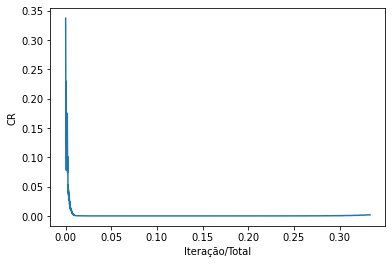

In [19]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

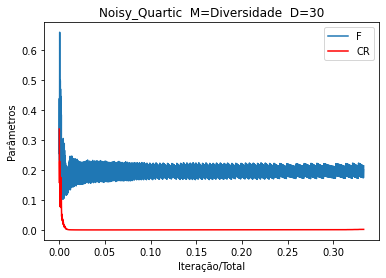

In [20]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=30')

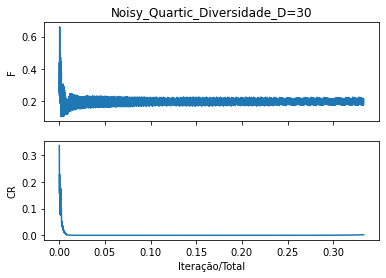

In [21]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [22]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 900000 Iterações= 3000 Dim= 30 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-3000 

MÉDIA:  0.21669265129230714
MIN __: 0.08246215205900358
MAX__:  0.34582097764145775
STD __: 0.05961428947214622
Tempo Médio= 173.109 segundos ---
50 Rodadas

BEST:  [ 0.28143531  0.00040915 -0.03193751 -0.16511282 -0.00843366  0.01283293
  0.08165892 -0.00812063 -0.08871304  0.18128762  0.09595969 -0.09707635
 -0.13908219  0.10477164 -0.0230867  -0.03547656  0.08798253 -0.14933439
 -0.02723065 -0.05368313  0.00966738 -0.06306881 -0.0700475   0.08929105
 -0.06762783 -0.1032516   0.05242319 -0.09362545  0.09973333 -0.06657949
  0.08246215]
